<a href="https://colab.research.google.com/github/ramiro-l/ModelosYSimulacionFAMAF/blob/main/Pr%C3%A1ctico5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRÁCTICO 5

## Ejercicio 1

Desarrolle un método para generar una variable aleatoria cuya densidad de probabilidad es:

### a)

$$
f(x) =
\begin{cases}
\frac{x-2}{2} & \text{si } 2 \leq x \leq 3 \\
\frac{2 - x/3}{2} & \text{si } 3 \leq x \leq 6 \\
0 & \text{en otro caso}
\end{cases}
$$

#### Parte Teorica

Para poder usar transformada inversa tengo que encontrar su $F(x)$, para ello tengo que calcular $\int_{-∞}^{x}f(x)dx$.


Si $-∞≤x≤2$
\begin{align*}
\int_{-∞}^{x}f(x)dx & = 0
\end{align*}


Si $2≤x≤3$
\begin{align*}
\int_{-∞}^{x}f(x)dx & = \int_{-∞}^{x}(x-2)/2dx \\
& = \frac{x^{2}}{4}-x+1
\end{align*}

Si $3≤x≤6$
\begin{align*}
\int_{-∞}^{x}f(x)dx & = \int_{2}^{3}f(x)dx + \int_{3}^{6}f(x)dx \\
& = \frac{3^{2}}{4}-3+1 + \int_{3}^{6}f(x) \\
& = \frac{-x^{2}}{12}+x-2
\end{align*}

Entonces nos queda que:

$$
F(x) =
\begin{cases}
0 & \text{si } x \le 2 \\
\frac{x^{2}}{4}-x+1 & \text{si } 2 \le x \le 3 \\
\frac{-x^{2}}{12}+x-2 & \text{si } 3 \le x \le 6 \\
1 & \text{si } x \ge 6
\end{cases}
$$

Notar que el punto de quiebre es en

$$
F(3) = \frac{3^{2}}{4}-3+1 = \frac{9}{4}-2 = \frac{1}{4}
$$

Ahora queda calcular $F^{-1}$ por partes igualando a $u$ una uniforme en el $0,1$.

> Recordar **Bhaskara**:
>
> Si $ax^{2} + bx + c = 0$ tenemos que las raices son
> $$ x_1 = \frac{-b + \sqrt{b^2 - 4ac}}{2a}\ \ \ \ y\ \ \ \ x_2 = \frac{-b - \sqrt{b^2 - 4ac}}{2a}$$

Tenemos que despejar:

$$
u = \frac{x^{2}}{4}-x+1 \ \ \ \ (1)
$$
y
$$
u = \frac{-x^{2}}{12}+x-2 \ \ \ \ (2)
$$

Veamos (1)

\begin{align*}
u & = \frac{x^{2}}{4}-x+1 \\
0 & = \frac{x^{2}}{4}-x+(1-u) \\
0 & = \frac{1}{4} \cdot x^{2}+(-1) \cdot x+(1-u)
\end{align*}

entonces $a=\frac{1}{4}$, $b=-1$ y $c=1-u$

\begin{align*}
x_i & = \frac{-(-1) \pm \sqrt{(-1)^2 - 4\frac{1}{4}(1-u)}}{2\frac{1}{4}} \\
x_i & = \frac{1 \pm \sqrt{1 - 1+u}}{\frac{1}{2}} \\
x_i & = (1 \pm \sqrt{u})\cdot2 \\
\end{align*}

entonces

$$
x_1 = 2 + 2\cdot\sqrt{u} \ \ \ \ \ \ y \ \ \ \ \ \ x_2 = 2 - 2\cdot\sqrt{u}
$$

Como $x_1$ toma valores entre el $[2,4]$ y $x_2$ toma valores en el $[0,2]$ usamos $x_1$

Veamos (2)

\begin{align*}
u & = \frac{-x^{2}}{12}+x-2  \\
0 & = \frac{-x^{2}}{12}+x-2-u  \\
0 & = \frac{-1}{12} \cdot x^{2}+x+(-2-u)  \\
\end{align*}

entonces $a=\frac{-1}{12}$, $b=1$ y $c=(-2-u)$ por lo tanto

\begin{align*}
x_i & =  \frac{-1 \pm \sqrt{1^2 - 4(\frac{-1}{12})(-2-u)}}{2(\frac{-1}{12})} \\
x_i & =  \frac{-1 \pm \sqrt{1 - \frac{2+u}{3}}}{\frac{-1}{6}} \\
x_i & =  6 \pm 6 \cdot \sqrt{ 1 - \frac{2+u}{3} } \\
x_i & =  6 \pm 6 \cdot \sqrt{ 1 - \frac{2}{3} - \frac{u}{3} } \\
x_i & =  6 \pm 6 \cdot \sqrt{ \frac{1}{3} - \frac{u}{3} } \\
x_i & =  6 \pm 6 \cdot \sqrt{\frac{1 - u}{3}} \\
x_i & =  6 \pm 2 \cdot 3 \cdot \sqrt{\frac{1 - u}{3}} \\
x_i & =  6 \pm 2 \cdot \sqrt{9} \cdot \sqrt{\frac{1 - u}{3}} \\
x_i & =  6 \pm 2 \cdot \sqrt{9\cdot(\frac{1 - u}{3})} \\
x_i & =  6 \pm 2 \cdot \sqrt{3\cdot(1 - u)} \\
\end{align*}

entonces

$$
x_1 = 6 - 2 \cdot \sqrt{3\cdot(1 - u)}  \ \ \ \ \ \ y \ \ \ \ \ \ x_2 = 6 + 2 \cdot \sqrt{3\cdot(1 - u)}
$$

Como $x_1$ toma valores aproximadamente entre el $[2.5,6]$ y $x_2$ toma valores en el $[6,8.5]$ usamos $x_1$





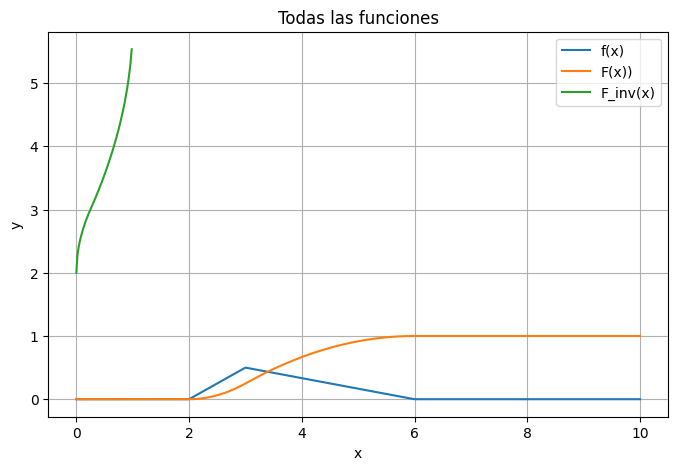

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de f(x)
def f(x):
    return np.where(
        (2 <= x) & (x <= 3),
        (x - 2) / 2,
        np.where(
            (3 < x) & (x <= 6),
            (2 - x / 3) / 2,
            0
        )
    )

# Definición de F(x)
def F(x):
    return np.where(
        (x <= 2),
        0,
        np.where(
            (x <= 3),
            (x**2)/4 - x + 1,
            np.where(
                (x <= 6),
                -x**2/12 + x - 2,
                1
            )
        )
    )

# Definición de F_inv(x)
def F_inv(x):
    return np.where(
        (x <= 1/4),
        2 + 2 * np.sqrt(x),
        np.where(
            (x <= 1),
            6 - 2 * np.sqrt(np.maximum(0, 3 * (1 - x))),
            np.nan
        )
    )


# Dominio común
x = np.linspace(0, 10, 500)

# Evaluar funciones
y_f = f(x)
y_F = F(x)
y_F_inv = F_inv(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y_f, label="f(x)")
plt.plot(x, y_F, label="F(x))")
plt.plot(x, y_F_inv, label="F_inv(x)")


plt.title("Todas las funciones")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#### Código

In [ ]:
from random import random

def f_tinv():
  u = random()
  if u < 0.25:
    return 2 + 2*np.sqrt(u)
  else:
    return 6 - 2*np.sqrt(3*(1-u))


In [ ]:
f_tinv()

np.float64(5.144761229090943)

#### Revisamos
Revisamos que lo generado corresponda con la distibución deseada:

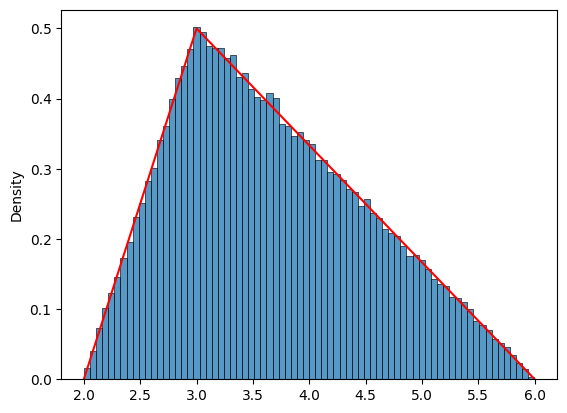

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def f(x):
    return np.where(
        (2 <= x) & (x <= 3),
        (x - 2) / 2,
        np.where(
            (3 < x) & (x <= 6),
            (2 - x / 3) / 2,
            0
        )
    )

x = np.linspace(2, 6, 1000) # Genero el intervalo
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=f_tinv()


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

### b)

$$
f(x) =
\begin{cases}
\frac{6(x+3)}{35} & \text{si } 0 \leq x \leq 1 \\
\frac{6x^2}{35} & \text{si } 1 \leq x \leq 2 \\
0 & \text{en otro caso}
\end{cases}
$$

#### Parte teorica

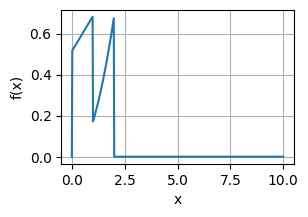

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.where(
        (x <= 0),
        0,
        np.where(
            (x <= 1),
            (6 * (x + 3)) / 35,
            np.where(
                (x <= 2),
                (6 * x**2)/ 35,
                0
            )
        )
    )

x = np.linspace(0, 10, 500)
y_f = f(x)

plt.figure(figsize=(3, 2))
plt.plot(x, y_f)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()


> Aclaración: No voy a ir con tanto detalle, el procedimiento es similar a la parte a).

Calculo $F(x)$ por partes:

Si $-∞≤x≤0$
\begin{align*}
\int_{-∞}^{x}f(x)dx & = 0
\end{align*}

Si $0≤x≤1$
\begin{align*}
\int_{-∞}^{x}f(x)dx & = \int_{0}^{x} \frac{6(x+3)}{35}dx \\
& =  \frac{6}{35} ⋅ \int_{0}^{x} (x+3)dx \\
& =  \frac{6}{35} ⋅ \left[\frac{x^2}{2}+3x\right]_0^x \\
& =  \frac{6}{35} ⋅ \left(\left(\frac{x^2}{2}+3x\right) - \left(\frac{0^2}{2}+3\cdot0\right)\right)\\
& =  \frac{6}{35} ⋅ \left(\frac{x^2}{2}+3x\right) \\
& =  \frac{6}{35} ⋅ \frac{x^2}{2}+ \frac{6}{35} ⋅ 3x \\
& =  \frac{3}{35} ⋅ x^2+ \frac{18}{35} ⋅ x \\
& =  \frac{3}{35} ⋅ x^2+ \frac{18}{35} ⋅ x \\
\end{align*}

Si $1≤x≤2$
\begin{align*}
\int_{-∞}^{x}f(x)dx & = \int_{0}^{1}f(x)dx + \int_{1}^{x} \frac{6x^2}{35} dx \\
& = \frac{3}{35} ⋅ 1^2+ \frac{18}{35} ⋅ 1+ \int_{1}^{x} \frac{6x^2}{35} dx \\
& = \frac{21}{35} + \int_{1}^{x} \frac{6x^2}{35} dx \\
& = \frac{21}{35}  + \frac{6}{35} \cdot \int_{1}^{x} x^2 dx \\
& = \frac{21}{35}  + \frac{6}{35} ⋅ \left[\frac{x^3}{3}\right]_1^x \\
& =  \frac{21}{35}  + \frac{6}{35} ⋅ \left(\left(\frac{x^3}{3}\right) - \left(\frac{1^3}{3}\right)\right)\\
& =  \frac{21}{35}  + \frac{6}{35} ⋅ \left(\left(\frac{x^3}{3}\right) - \left(\frac{1}{3}\right)\right)\\
& = \frac{21}{35}  + \frac{6}{35} ⋅ \frac{x^3}{3} - \frac{6}{35} ⋅ \frac{1}{3}\\
& =\frac{21}{35}  + \frac{2}{35} ⋅ x^3 - \frac{2}{35} \\
& = \frac{2}{35} ⋅ x^3 + \frac{19}{35} \\
\end{align*}

> Revisar que F(2) sea 1:
> $$\frac{2}{35} ⋅ 2^3 + \frac{19}{35} = \frac{16}{35} + \frac{19}{35} = \frac{53}{35} = 1$$

entonces F(x) queda definida por:


$$
F(x) =
\begin{cases}
0 & \text{si } x < 0 \\
\frac{3}{35} ⋅ x^2+ \frac{18}{35} ⋅ x  & \text{si } 0 \le x \le 1 \\
\frac{2}{35} ⋅ x^3 + \frac{19}{35} & \text{si } 1 < x \le 2 \\
1 & \text{si } x > 2
\end{cases}
$$

y el punto de quiebre es en:

$$
F(1) = \frac{3}{35} ⋅ 1^2+ \frac{18}{35} ⋅ 1 = \frac{3}{35}+ \frac{18}{35} = \frac{21}{35} = \frac{3}{5}
$$





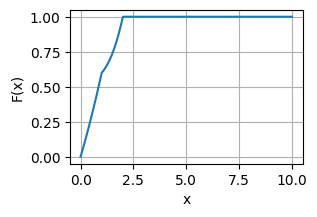

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def F(x):
    return np.where(
        (x <= 0),
        0,
        np.where(
            (x <= 1),
            (3 / 35) * x**2 + (18 / 35) * x,
            np.where(
                (x <= 2),
                (2 / 35) * x**3 + (19 / 35),
                1
            )
        )
    )

x = np.linspace(0, 10, 500)
y_F = F(x)

plt.figure(figsize=(3, 2))
plt.plot(x, y_F)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid(True)
plt.show()

Ahora queda despejar la $x$ de:

$$
u = F(x)
$$

Si $0≤x≤1$
\begin{align*}
u & = F(x) \\
u & = \frac{3}{35} ⋅ x^2+ \frac{18}{35} ⋅ x \\
u & = \frac{1}{35} \cdot \left( 3 ⋅ x^2+ 18 ⋅ x \right) \\
u \cdot 35 & =  3 ⋅ x^2+ 18 ⋅ x  \\
0 & =  3 ⋅ x^2+ 18 ⋅ x - u \cdot 35  \\
\end{align*}

Ahora buscamos las raices con $a=3$ , $b=18$ y $c=(-u\cdot35)$:

\begin{align*}
x_i & = \frac{-18 \pm \sqrt{18^2 - 4\cdot3(-u⋅35)}}{2\cdot3} \\
 & = \frac{-18 \pm \sqrt{18^2 + 4⋅3⋅35⋅u}}{6} \\
 & = \frac{-18 \pm \sqrt{324 + 420⋅u}}{6} \\
 & = -\frac{18}{6} \pm \frac{\sqrt{324 + 420⋅u}}{6}  \\
 & = -3 \pm \frac{\sqrt{324 + 420⋅u}}{6}  \\
\end{align*}

Claramente debemos tomar $x_2 =-3 + \frac{\sqrt{324 + 420⋅u}}{6}$ para que x este en el intervalor $(0,1)$.

Si $1 < x ≤ 2$

\begin{align*}
u & = F(x) \\
u & = \frac{2}{35} ⋅ x^3 + \frac{19}{35} \\
u - \frac{19}{35} & =  x^3 \\
\left(u - \frac{19}{35}\right)⋅\frac{35}{2} & =  x^3 \\
\sqrt[3]{\left(u - \frac{19}{35}\right)⋅\frac{35}{2}} & =  x \\
\sqrt[3]{u\cdot\frac{35}{2} - \frac{19}{35}⋅\frac{35}{2}} & =  x \\
\sqrt[3]{u\cdot\frac{35}{2} - \frac{19}{2}} & =  x
\end{align*}




<ipython-input-33-dfe16280da14>:14: RuntimeWarning: invalid value encountered in power
  (x*(35/2)-(19/2))**(1/3),


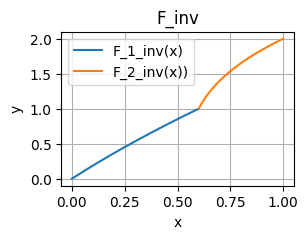

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def F_1_inv(x):
    return np.where(
        (x <= 3/5),
        -3 + np.sqrt(324 + 420 * x) / 6,
        np.nan
    )

def F_2_inv(x):
    return np.where(
        (x > 3/5) & (x <= 1),
        (x*(35/2)-(19/2))**(1/3),
        np.nan
    )


# Dominio común
x = np.linspace(0, 1, 1000)

# Evaluar funciones
y_F_1_inv = F_1_inv(x)
y_F_2_inv = F_2_inv(x)

plt.figure(figsize=(3, 2))
plt.plot(x, y_F_1_inv, label="F_1_inv(x)")
plt.plot(x, y_F_2_inv, label="F_2_inv(x))")

plt.title("F_inv")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#### Código

In [ ]:
from random import random
import numpy as np

def f_tinv_ejb():
  u = random()
  if u <= 3/5:
    return -3 + np.sqrt(324 + 420 * u) / 6
  else:
    return ((u*35-19)/2)**(1/3)

In [ ]:
f_tinv_ejb()

np.float64(0.14405591049286715)

#### Revisamos

Revisamos que lo generado corresponda con la distibución deseada:

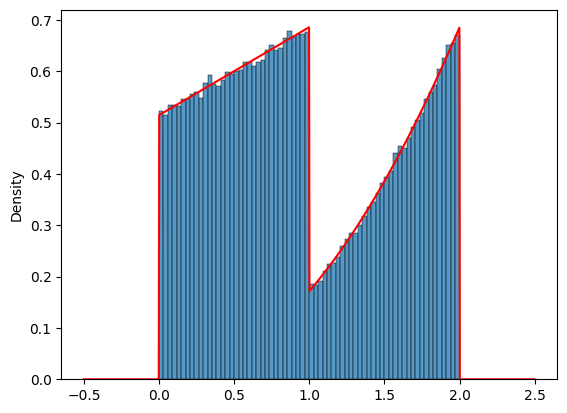

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.where(
        (x <= 0),
        0,
        np.where(
            (x <= 1),
            (6 * (x + 3)) / 35,
            np.where(
                (x <= 2),
                (6 * x**2)/ 35,
                0
            )
        )
    )

x = np.linspace(-0.5, 2.5, 1000)
n_sim = int(4e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=f_tinv_ejb()


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

### c)

$$
f(x) =
\begin{cases}
\frac{e^{4x}}{4} & \text{si } -\infty < x \leq 0 \\
\frac{1}{4} & \text{si } 0 < x \leq \frac{15}{4} \\
0 & \text{en otro caso}
\end{cases}
$$

#### Parte teorica

Echa en papel, es facil.

#### Código

In [ ]:
from random import random
import numpy as np

def f_tinv_ejc():
  u = random()
  if u <= 1/16:
    return np.log(16*u)/4
  else:
    return 4*u-1/4


In [ ]:
f_tinv_ejc()

2.0705212509594135

#### Revisamos

Revisamos que lo generado corresponda con la distibución deseada:

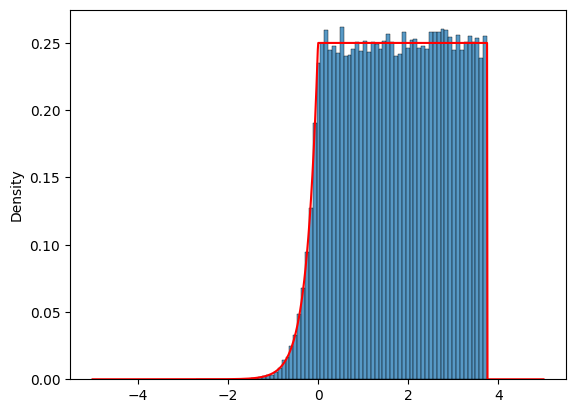

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.where(
        (x <= 0),
        np.exp(4 * x) / 4,
        np.where(
            (x <= 15/4),
            1/4,
            0
        )
    )

x = np.linspace(-5, 5, 1000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=f_tinv_ejc()


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

## Ejercicio 2

### a)

Desarrolle métodos para generar las siguientes variables aleatorias:

> Ayuda: la distribución Pareto y la distribución Weibull tienen distribución acumulada F con forma
cerrada, por lo cual puede aplicarse el método de la transformada Inversa. La distribución de Erlang
pertenece a la familia de las Gammas. Puede simularse por rechazo o como suma de exponenciales.


### i) Distribución Pareto


$$f(x) = a x^{-(a+1)}, \quad 1 \leq x < \infty,\quad a > 0$$

#### Parte teorica

Como se menciona que tiene una F() cerrada, voy a usar el metodo de la transformada inversa.

Primero voy a buscar su función de distibución acumulada (F(x)), analizando por intervalos:

Si $-∞≤x≤1$:
\begin{align*}
F(x) = \int_{-∞}^{x} f(x) dx = 0
\end{align*}

Si $1≤x≤∞$:
\begin{align*}
F(x) & = \int_{-∞}^{x} f(x) dx \\
& = \int_{1}^{x} a x^{-(a+1)} dx \\
& = a⋅\int_{1}^{x} x^{-(a+1)} dx \\
& = a⋅\left[ \frac{x^{-(a+1)+1}}{-(a+1)+1} \right]_1^{}\\
& = a⋅\left[ \frac{x^{-a}}{-a} \right]_1^{x} \\
& = a⋅\left( \frac{x^{-a}}{-a} -  \frac{1^{-a}}{-a} \right) \\
& = a⋅ \frac{1}{-a} ⋅ \left( x^{-a} -  1^{-a} \right) \\
& = - \left( x^{-a} -  1^{-a} \right) \\
& = - \left( x^{-a} -  1 \right) \\
& = 1 - x^{-a} \\
\end{align*}

entonces tenemos que:

$$
F(x) =
\begin{cases}
0 & \text{si } x < 1 \\
1 - x^{-a}  & \text{si } 1 \le x \le ∞ \\
\end{cases}
$$

> Claramente $F(∞) = 1 - x^{-∞} = 1 - \frac{1}{x^{∞}} = 1-0 = 1$

Ahora igualamos $F(x)$ a $u$ una v.a uniforme en el $(0,1)$ y despejamos la $x$.

\begin{align*}
F(x) & = u \\
1 - x^{-a} & = u \\
1 - u  & =  x^{-a} \\
\sqrt[-a]{1 - u} & =  \sqrt[-a]{x^{-a}} \\
\sqrt[-a]{1 - u} & =  x \\
\left(1 - u\right)^{-\frac{1}{a}} & =  x \\
\end{align*}

#### Código

In [ ]:
from random import random
import numpy as np

def pareto_tinv(a):
  u = random()
  return (1-u)**(-1/a)

In [ ]:
pareto_tinv(2)

2.115085818617671

#### Revisamos

Basicamente revisamos que lo generado corresponda con la distibución deseada:

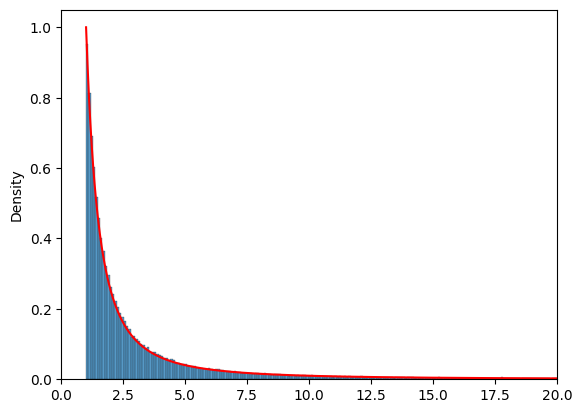

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

a = 1

def f(x):
    return np.where(
        (x <= 0),
        0,
        a*(x**(-(a+1)))
    )



limit = 20
x = np.linspace(1, limit, 1_000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=pareto_tinv(a)

s_filtered = s[s < limit]
sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s_filtered, stat = 'density')
plt.xlim(0, limit)
plt.show()

### ii) Distribución Erlang

$$f(x) = \frac{x^{k-1} e^{-x/\mu}}{(k -1)! \, \mu^{k}}, \quad 0 \leq x < \infty,\quad \mu > 0,\quad k\ \text{entero}$$

#### Parte teorica

En la consigna nos ayuda diciendo que se parece a una gama y por ello conviene usar el metodo de acepración y rechazo. Recordemos la **PDF** de una gama:

Dados $α > 0$ y $β > 0$ tenemos que:
$$
f_{Gama}(x) = \frac{1}{\Gamma(α)} β^{-α} x^{α - 1} e^{-x/β}\ \ \ \ si\ x>0
$$

pero si tomamos $α  = k \in N$, tenemos que:
\begin{align*}
f_{Gama}(x) & = \frac{1}{(k−1)!} β^{-k} x^{k - 1} e^{-x/β} \\
& = \frac{x^{k - 1} e^{-x/β}}{(k−1)! β^{k}}
\end{align*}

y asi llegamos a la f. Notar que $f_{Gama}$ y la nuesta son iguals si $k = \alpha$ y $α =β$.

Ahora queda ver que metodo usar. Recordar que en el teorico vimos que:

- **Distribucion del tiempo de arribo (2.1.4)** \\
Dadas $X_1, X_2, . . . , X_n$ con $Xj∼E(λ)$ tenemos que
$$
\sum_{i=1}^{n} X_i ∼ Gama\left(n, \frac{1}{λ}\right)
$$

- **Usar aceptación y rechazo con una exponencial** \\
Mucho laburo ...

De todas formas hay que generar una exponencial y luego usarla.


#### Código

In [ ]:
from random import random
from numpy import log

def exponencial(lamda):
  U = 1-random()
  return -log(1-U)/lamda

In [ ]:
def erlang_sum_exp(k,u):
  exp = [exponencial(1/u) for _ in range(k)]
  return sum(exp)

In [ ]:
erlang_sum_exp(2,2)

np.float64(3.257135549446696)

#### Revisamos

Revisamos que lo generado corresponda con la distibución deseada:

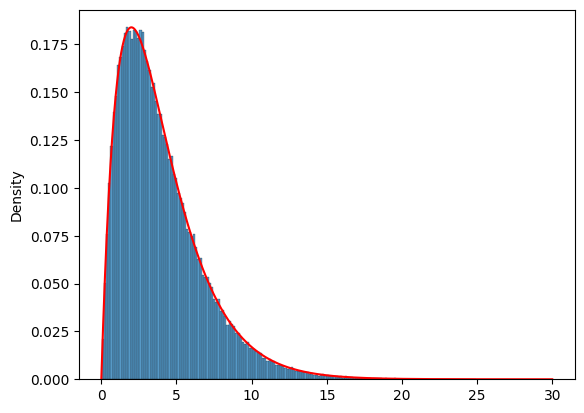

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

k = 2
u = 2

def f(x):
    return np.where(
        (x >= 0),
        (x**(k-1) * np.exp(-x/u)) / (math.factorial(k-1) * u**k),
        0
    )

x = np.linspace(0, 30, 1000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=erlang_sum_exp(k,u)


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

### iii) Distribución Weibull

$$
f(x) = \frac{\beta}{\lambda} \left( \frac{x}{\lambda} \right)^{\beta - 1}e^{- \left( x/\lambda \right)^{\beta}}, \quad x \geq 0,\quad \lambda > 0,\quad \beta > 0
$$

Notar que se puede simplificar:

\begin{align*}
f(x) & = \frac{\beta}{\lambda} \left( \frac{x}{\lambda} \right)^{\beta - 1}e^{- \left( x/\lambda \right)^{\beta}} \\
 & = \beta \lambda^{-1} \left( \frac{x}{\lambda} \right)^{\beta - 1}e^{- \left( x/\lambda \right)^{\beta}} \\
 & = \beta \lambda^{-1} \lambda^{-({\beta - 1})} x^{\beta - 1} e^{- \left( x/\lambda \right)^{\beta}} \\
 & = \beta \lambda^{-1} \lambda^{-\beta + 1} x^{\beta - 1} e^{- \left( x/\lambda \right)^{\beta}} \\
 & = \beta \lambda^{-\beta} x^{\beta - 1} e^{- \left( x/\lambda \right)^{\beta}} \\
\end{align*}

#### Parte teorica

Segun la ayuda, tenemos que $f$ tiene que existe formula cerrada para $F$ y nos sirve para usar el metodo de la trasnformada inversa.

Calculemos:

\begin{align*}
F(x) & = \int_{-∞}^{x} f(x) dx \\
& = \int_{-∞}^{x} \beta \lambda^{-\beta} x^{\beta - 1} e^{- \left( x/\lambda \right)^{\beta}} dx \\
& =  \beta \lambda^{-\beta}  \int_{-∞}^{x}x^{\beta - 1} e^{- \left( x/\lambda \right)^{\beta}} dx \\
& ... \\
& = 1-e^{−(x/λ)^β}
\end{align*}

> Ayuda: https://en.wikipedia.org/wiki/Weibull_distribution

por lo tanto si igualamos a $u$ una v.a uniforme en el (0,1):

\begin{align*}
F(x) & = u \\
1-e^{-(x/λ)^{β}} & = u \\
e^{-(x/λ)^{β}} & = 1-u \\
\frac{1}{e^{(x/λ)^{β}}} & = 1-u \\
e^{(x/λ)^{β}} & = \frac{1}{1-u} \\
(x/λ)^{β} & = ln\left(\frac{1}{1-u} \right)\\
x/λ & = \sqrt[β]{ ln\left(\frac{1}{1-u} \right)}\\
x & = \sqrt[β]{ ln\left(\frac{1}{1-u} \right)} ⋅ λ\\
x & = \sqrt[β]{-ln(1-u)} ⋅ λ\\
\end{align*}


#### Código

In [ ]:
from random import random
import numpy as np

def weibull_tinv(beta, lamda):
  u = random()
  return ((np.log(1/(1-u)))**(1/beta)) * lamda

In [ ]:
weibull_tinv(2,2)

np.float64(2.066015008782673)

#### Revisamos

Revisamos que lo generado corresponda con la distibución deseada:

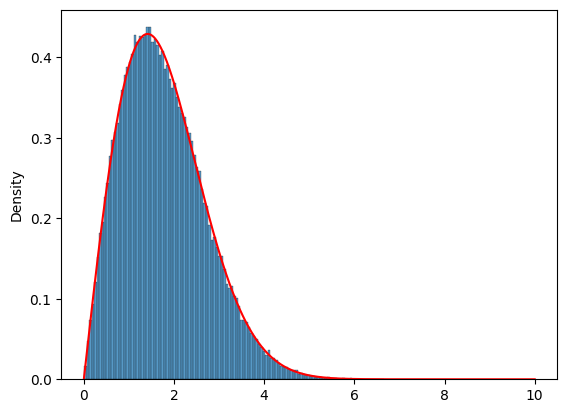

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

beta = 2
lamda = 2

def f(x):
    return np.where(
        (x <= 0),
        0,
        (beta/lamda) * (x/lamda)**(beta-1) * np.exp(-(x/lamda)**beta)
    )



x = np.linspace(0, 10, 1_000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=weibull_tinv(beta, lamda)

sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

### b) Compara valor exacto y estimación de la media
Estime la media de cada variable con 10.000 repeticiones, usando los parámetros $α$ = 2, µ = 2, k = 2, λ = 1, β = 2. Busque en la web los valores de las esperanzas para cada variable con estos parámetros (cuidado con las parametrizaciones) y compare los valores obtenidos.

Fuentes:

- https://en.wikipedia.org/wiki/Pareto_distribution \\
$E[Pareto(α)] = α/(α-1)$ si $α>1$ \\
$E[Pareto(α)] = ∞\ \ \ \  \ \ \ \ \ \ \ \ \ \ $si $α ≤ 1$

- De las notas de clase \\
$E[Erlang(k,μ)] = E[Gamma(k,μ)] = k\cdotμ$

- De las notas de clase \\
$E[Weibull(β,λ)] = λ/β  \cdot \Gamma (1/β)$


In [ ]:
import math

def pareto_esperanza_exacta(a):
  return a/(a-1)

def erlang_esperanza_exacta(k,u):
  return k*u

def weibull_esperanza_exacta(beta, lamda):
  return (lamda/beta)*math.gamma(1/beta)

def etimacion_esperanza(N, metodo, *args,**kwargs):
  valores = [metodo(*args, **kwargs) for _ in range(N)]
  return sum(valores)/N

N = 10000
parametros = [
    ("Pareto", {"a": 2}, pareto_tinv, pareto_esperanza_exacta),
    ("Erlang", {"k": 2, "u": 2}, erlang_sum_exp, erlang_esperanza_exacta),
    ("Weibull", {"beta": 2, "lamda": 1}, weibull_tinv, weibull_esperanza_exacta),
]

for nombre, parametros_metodo, metodo, esperanza_exacta in parametros:
  estimacion_esperanza = etimacion_esperanza(N, metodo, **parametros_metodo)
  esperanza_exacta = esperanza_exacta(**parametros_metodo)
  print("-"*50)
  print(f"Distibución {nombre}")
  print(f"-   Estimación de la esperanza: {estimacion_esperanza}")
  print(f"-   Esperanza exacta: {esperanza_exacta}")
  print("-"*50)




--------------------------------------------------
Distibución Pareto
-   Estimación de la esperanza: 2.0174864571590367
-   Esperanza exacta: 2.0
--------------------------------------------------
--------------------------------------------------
Distibución Erlang
-   Estimación de la esperanza: 3.968814879335733
-   Esperanza exacta: 4
--------------------------------------------------
--------------------------------------------------
Distibución Weibull
-   Estimación de la esperanza: 0.8821168772378932
-   Esperanza exacta: 0.8862269254527579
--------------------------------------------------


## Ejercicio 3

Método de la composición:


### a)
Suponga que es relativamente fácil generar n variables aleatorias a partir de sus distribuciones de
probabilidad $Fi, i = 1,...,n$. Implemente un método para generar una variable aleatoria cuya distribución de probabilidad es
$$
F(x) = \sum_{i=1}^n p_i \cdot F_i(x)
$$

donde $p_i, i = 1,...,n$, son números no negativos cuya suma es 1.


#### Metodo

In [59]:
from random import random
from collections.abc import Callable
from typing import TypeAlias

VariableAleatoria: TypeAlias = Callable[[],float]

def composicion(p: list[float], metodos: list[VariableAleatoria]) -> VariableAleatoria:
  if sum(p) != 1:
    raise ValueError("La suma de los pesos debe ser 1")
  if len(p) != len(metodos):
    raise ValueError("La cantidad de pesos debe ser igual a la cantidad de métodos")

  sum_p: float = 0.0
  acum_p: list[float] = []
  for i in range(len(p)):
    sum_p += p[i]
    acum_p.append(sum_p)

  def va() -> float:
    u = random()
    for i in range(len(acum_p)):
      if u <= acum_p[i]:
        return metodos[i]()

  return va

#### Demostración

Llamemos $Z$ la variable aleatoria propuesta. Ademas denotemos $X_1,\dots,X_n$ las v.a de las $F_i$ con $i=1,\dots,n$. Sea $M_j$ el conjunto de valores que toma $X_i$  en donde este definida con $j \in N$ y por ultimo sean $f_{X_i}$ las funciones de probabilida de densidad asociadas.

Ahora si con esto podemos analizar mejor $Z$.

Sea $x$ cualquiera:
\begin{align*}
f_Z(x) & = P(Z = x) \\
& = \sum_{i=1}^{n} p_i ⋅ P(X_j = x) \\
& = \sum_{i=1}^{n} p_i ⋅ f_{X_i}(x)
\end{align*}

> Recordar que cada $f_{X_i}$ esta definida para todo valor $x$ y si no se escribe entonces se asume que $f_{X_i}(x) = 0$.

Ahora calculemos su acumulada:

\begin{align*}
F_Z(x) & = \int_{-∞}^{x} f_Z(x) dx \\
& = \int_{-∞}^{x} f_Z(x) dx \\
& = \int_{-∞}^{x} \sum_{i=1}^{n}  p_i⋅f_{X_i}(x) dx \\
& = \sum_{i=1}^{n} p_i⋅ \int_{-∞}^{x} f_{X_i}(x) dx \\
& = \sum_{i=1}^{n} p_i⋅ F_{X_i}(x) \\
\end{align*}


### b)
Genere datos usando tres exponenciales independientes con media 3, 5 y 7 respectivamente y p =(0.5,0.3,0.2). Calcule la esperanza exacta de la mezcla y estime con 10.000 repeticiones. Tenga cuidado con la parametrización que este usando!!

#### Esperanza exacta

Caculemos la esperanza exacta:

$$
X_1 \backsim \mathcal{E} (λ=(1/3))\ \ ,\ \
X_2 \backsim \mathcal{E} (λ=(1/5))\ \ ,\ \
X_3 \backsim \mathcal{E} (λ=(1/7))
$$
\begin{align*}
E[Z] & =\sum_{i=1}^{n} p_i⋅ E[{X_i}] \\
& =  0.5 ⋅ E[{X_1}] + 0.3 ⋅ E[{X_2}] + 0.2 ⋅ E[{X_3}] \\
& =  0.5 ⋅ 3 + 0.3 ⋅ 5 + 0.2 ⋅ 7 \\
& = 4,4
\end{align*}

#### Código

In [39]:
from random import random
from numpy import log

def exponencial(lamda):
  U = 1-random()
  return -log(1-U)/lamda

In [58]:
p_s = [0.5,0.3,0.2]
metodos =[ lambda: exponencial(1/3), lambda: exponencial(1/5), lambda: exponencial(1/7)]

va_Z = composicion(p_s, metodos)

#### Comparación

In [56]:
N = 10**4
valores = [va_Z() for _ in range(N)]
estimacion_esperanza = sum(valores)/N
print(f"Estimación de la esperanza: {estimacion_esperanza}")
print(f"Esperanza exacta: {4.4}")

Estimación de la esperanza: 4.4041666034684
Esperanza exacta: 4.4


## Ejercicio 4 😰😰😰


Desarrolle un método para generar la variable aleatoria con función de distribución:

$$
F(x) = \int_0^∞ x^y e^{-y} dy,\ \ \ \ \ \ 0 ≤ x ≤ 1
$$

Piense en el método de composición del ejercicio anterior. En particular, sea F la función de distribución de X y suponga que la distribución condicional de X dado Y = y es

$$
P(X ≤ x|Y = y) = x^y,\ \ \ \ \ \ \ \ 0 ≤ x ≤ 1
$$


#### Parte teorica

Si suponemos $Y \backsim \mathcal{E}(λ=1)$, por definición:

$$f_Y(x) =e^{-x}$$

Entonces si asumimos que $P(X ≤ x|Y = y) = x^y$, tenemos que:

\begin{align*}
F(x) & = \int_0^∞ x^y e^{-y} dy \\
& = \int_0^∞ P(X ≤ x|Y = y) f_Y(y) dy
\end{align*}

## Ejercicio 5

### a) Metodos

Considere que es sencillo generar una variable aleatoria a partir de cualquiera de las distribuciones $F_i, i = 1,...,n$. Explique cómo generar variables aleatorias a partir de las siguientes distribuciones:

> **Sugerencia**: Si $X_i, i = 1,...,n$, son variables aleatorias independientes, donde $X_i$ tiene distribución $F_i$ ¿cuál variable aleatoria tiene como distribución a $F$ en cada caso?



#### i)
$$F_M(x) =\prod_{i=1}^n F_i(x)$$

##### Código

In [63]:
from random import random
from collections.abc import Callable

def composicion_M(metodos: list[Callable[[],float]]) -> float:
  valores = [metodo() for metodo in metodos]
  return max(valores)


##### Demostración

En el teorico vimos (pag 93, ej6.3) que si son $X_1,…,X_n$ v.a independientes con función de distribucion acumulada $F_1,…,F_n$ si:
$$
M = \max\{X_1,...,X_n\}
$$
entonces
$$
F_M(x) = F_1(x) \dots F_n(x) = \prod_{i=1}^n F_i(x)
$$

#### ii)
$$F_M(x) =1-\prod_{i=1}^n (1-F_i(x))$$

##### Código

In [64]:
from random import random
from collections.abc import Callable

def composicion_m(metodos: list[Callable[[],float]]) -> float:
  valores = [metodo() for metodo in metodos]
  return min(valores)


##### Demostración

En el teorico vimos (pag 27) que si son $X_1,…,X_n$ v.a independientes con función de distribucion acumulada $F_1,…,F_n$ si:
$$
M = \min\{X_1,...,X_n\}
$$
entonces
$$
1 - F_M(x) = (1-F_1(x)) \dots (1-F_n(x)) = \prod_{i=1}^n (1-F_i(x))
$$
por lo tanto
\begin{align*}
1 - F_M(x) & = \prod_{i=1}^n (1-F_i(x)) \\
-1 + F_M(x) & = - \prod_{i=1}^n (1-F_i(x)) \\
F_M(x) & = 1 - \prod_{i=1}^n (1-F_i(x)) \\
\end{align*}

### b) Muestras de M y m

Genere una muestra de 10 valores de las variables M y m con distribuciones $F_M$ y $F_m$ si $X_i$ son exponenciales independientes con parámetros 1, 2 y 3 respectivamente.


In [65]:
from random import random
from numpy import log

def exponencial(lamda):
  U = 1-random()
  return -log(1-U)/lamda

In [69]:
N = 10
metodos =[ lambda: exponencial(1), lambda: exponencial(2), lambda: exponencial(3)]

print("-"*100)
print(f"Variable M")
print([round(float(composicion_M(metodos)), 6) for _ in range(N)])
print("-"*100)
print(f"Variable m")
print([round(float(composicion_m(metodos)), 6) for _ in range(N)])
print("-"*100)

----------------------------------------------------------------------------------------------------
Variable M
[3.120511, 0.909118, 2.240785, 0.822157, 0.27318, 0.628103, 1.451072, 1.472779, 0.742259, 1.320877]
----------------------------------------------------------------------------------------------------
Variable m
[0.017144, 0.266311, 0.202298, 0.11119, 0.445671, 0.157791, 0.213326, 0.011426, 0.443329, 0.545373]
----------------------------------------------------------------------------------------------------


## Ejercicio 6

Utilice el **método del rechazo** y los resultados del **ejercicio anterior** para desarrollar otros dos métodos, además del método de la **transformada inversa**, para generar una variable aleatoria con distribución de probabilidad:
$$
F(x) = x^n,\ \ \ \ \ \ 0 ≤ x ≤ 1.
$$

Analice la eficiencia de los tres métodos para generar la variable a partir de F

> Notar que si $n < 1$, $F$ no esta bien definida porque da mayor a 1 en cualquier x menor que 1.

### Metodo de rechazo

#### Parte Teorica

Por definición tenemos que:

$$
f(x) = F'(x) = n⋅x^{n-1},\ \ con\ \ 0 ≤ x ≤ 1
$$

propongo $G \backsim U(0,1)$ por lo tanto $g(x) = 1$, entonces buscamos el $c$:

\begin{align*}
\frac{f(x)}{g(x)} & \le c \\
\frac{n⋅x^{n-1}}{1} & \le c \\
n⋅x^{n-1} & \le c \\
\end{align*}

Como $n ≥ 1$ y $0 ≤ x ≤ 1$ entonces $n⋅x^{n-1}$ es creciente por lo tanto el maximo esta en $x=1$, por ello $c= n⋅1^{n-1} = n$

Ahora en el código, tenemos que ver:
\begin{align*}
u & \le \frac{f(y)}{c\cdot g(y)} \\
u & \le \frac{1}{c}⋅n⋅y^{n-1} \\
u & \le \frac{1}{n}⋅n⋅y^{n-1} \\
u & \le y^{n-1} \\
\end{align*}

#### Código

In [100]:
from random import random

def X_metodo_rechazo(n:float) -> float:
  if(n < 1): raise ValueError("n debe ser mayor o igual a 1")
  while True:
    y = random()
    u = random()
    if u <= y**(n-1):
      return y

In [90]:
X_metodo_rechazo(10)

0.9502610539568618

### Metodo M (ej anterior)

#### Parte Teorica


Por definición tenemos que:

$$
F_X(x) = \prod_{i=1}^n x
$$


y con $X_1,…,X_n \backsim U(0,1)$ tenemos que $F_{X_i}(x) = x$ por lo tanto

$$
F_X(x) = \prod_{i=1}^n F_{X_i}(x)
$$

pero esto es lo mismo que $M$ usando las $X_1,…,X_n$. Por lo tanto $F_X = F_M$.

Entonces:
$$
X = M = \max\{X_1,\dots,X_n\}
$$

#### Código

In [99]:
from random import random
from collections.abc import Callable

def X_composicion_M(n:float) -> float:
  if(n < 1): raise ValueError("n debe ser mayor o igual a 1")
  valores = [random() for _ in range(n)]
  return max(valores)

In [85]:
X_composicion_M(10)

0.9952962393060946

### Metodo de la Inversa

#### Parte Teorica

Tenemos que:
$$
F(x) = x^n
$$
Ahora igualamos a $u$ una valor de una uniforme en el 0,1.

\begin{align*}
F(x) & = u \\
x^n & = u \\
x & = \sqrt[n]{u} = {u}^{1/n} \\
\end{align*}


#### Código

In [98]:
from random import random

def X_tinv(n:float) -> float:
  if(n < 1): raise ValueError("n debe ser mayor o igual a 1")
  u = random()
  return u**(1/n)

In [88]:
X_tinv(10)

0.8816438348612331

### Comparación

In [93]:
%%timeit
X_metodo_rechazo(10)

1.85 µs ± 402 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [92]:
%%timeit
X_composicion_M(10)

1.47 µs ± 443 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [94]:
%%timeit
X_tinv(10)

204 ns ± 24.9 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


En resumen el metodo de transformada inversa es el mejor.

### Revisamos

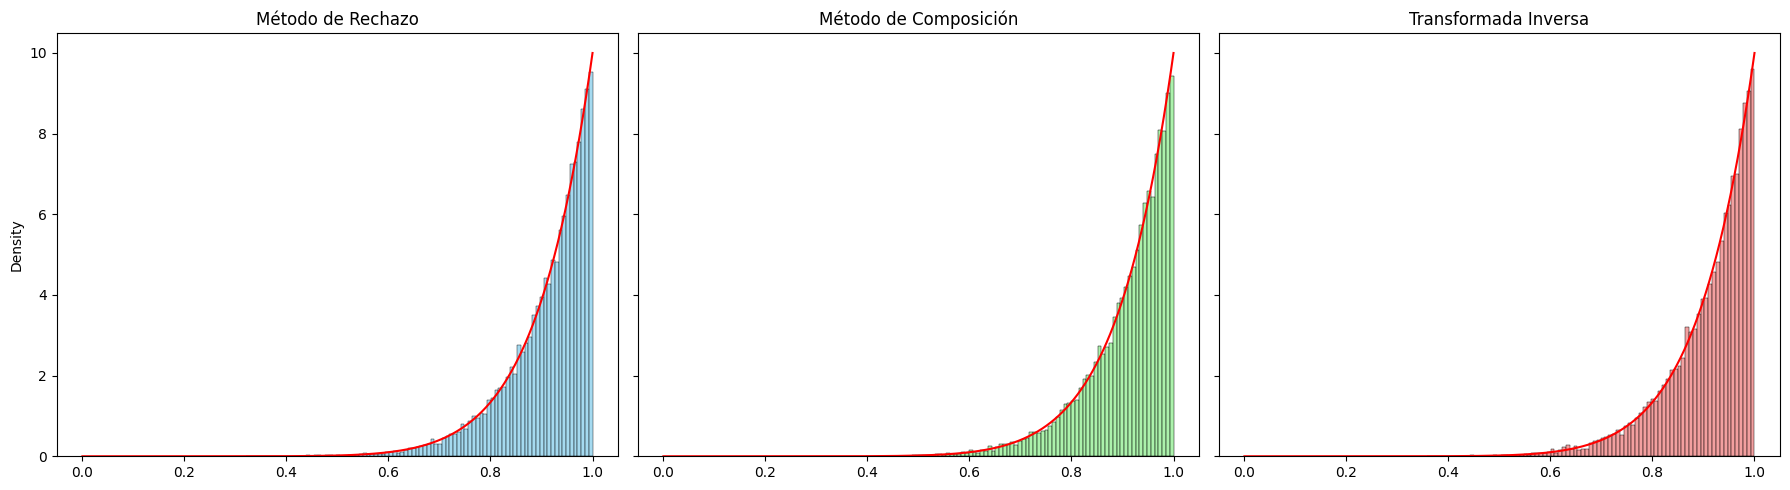

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

n = 10
def f(x):
    return np.where(
        (0 <= x) & (x <= 1),
        n*x**(n-1),
        0
    )

# Simulaciones
n_sim = int(2e4)
x = np.linspace(0, 1, 1000)
samples_rechazo = np.array([X_metodo_rechazo(n) for _ in range(n_sim)])
samples_compos = np.array([X_composicion_M(n) for _ in range(n_sim)])
samples_inv = np.array([X_tinv(n) for _ in range(n_sim)])

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Gráfico 1: Rechazo
sns.histplot(samples_rechazo, stat='density', ax=axes[0], color='skyblue')
axes[0].plot(x, f(x), color='red')
axes[0].set_title("Método de Rechazo")

# Gráfico 2: Composición
sns.histplot(samples_compos, stat='density', ax=axes[1], color='lightgreen')
axes[1].plot(x, f(x), color='red')
axes[1].set_title("Método de Composición")

# Gráfico 3: Transformada Inversa
sns.histplot(samples_inv, stat='density', ax=axes[2], color='lightcoral')
axes[2].plot(x, f(x), color='red')
axes[2].set_title("Transformada Inversa")

plt.tight_layout()
plt.show()

## Ejercicio 7

### a) Métodos

Desarrolle dos métodos para generar una variable aleatoria X con densidad de probabilidad:

$$
f(x) =
\begin{cases}
\frac{1}{x}, & \text{si } 1 \leq x \leq e, \\
0,           & \text{en otro caso}.
\end{cases}
$$



#### i) Transformada inversa


##### Parte Teorica

Tenemos que calcular primero $F(x)$:

Si $-∞ ≤ x < 1$
\begin{align*}
F(x) & = \int_{-∞}^x f(x) dx = 0
\end{align*}

Si $1 ≤ x < e$
\begin{align*}
F(x) & = \int_{-∞}^x f(x) dx \\
& = \int_{1}^x \frac{1}{x} dx \\
&\ = [\ln(x)]_{1}^x \\
&\ = \ln(x) - \ln (1) \\
&\ = \ln(x) \\
\end{align*}

> Revisamos, $F(e) = \ln(1) = 1$ por lo tanto eta bien.

Ahora si:

$$
F(x) =
\begin{cases}
0  & \text{si } x < 1, \\
\ln(x) & \text{si } 1 \leq x \leq e, \\
1 & \text{si } x ≥ e, \\
\end{cases}
$$

ahora igualamos a $u$ un valor de la v.a uniforme en el 0,1 y despejamos la x:

\begin{align*}
F(x) & = u \\
\ln(x) & = u \\
x & = e^u
\end{align*}

##### Código

In [131]:
from random import random
import math

def ej7_tinv() -> float:
  u = random()
  return math.exp(u)

In [132]:
ej7_tinv()

2.557534803183013

##### Revisamos

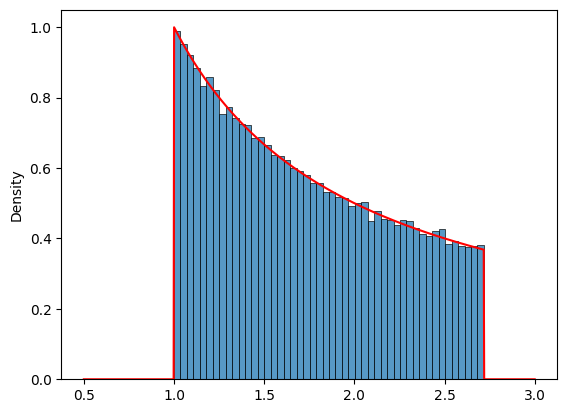

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import e

def f(x):
    return np.where(
        (1 <= x) & (x <= e),
        1/x,
        0
    )

x = np.linspace(0.5, 3, 1000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=ej7_tinv()


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

#### ii) Aceptación y rechazo

Aplicando el método de aceptación y rechazo con una variable uniforme.

##### Parte Teorica

Para usar el metodo de aceptación y rechazo voy a usar $Y \backsim U(0,e)$ por lo tanto  $f_Y(x) = \frac{1}{e}$.

Ahora despejemos el $c$:

\begin{align*}
\frac{f(x)}{f_Y(x)} & ≤ c \\
\frac{1/x}{1/e} & ≤ c \\
\frac{e}{x} & ≤ c \\
\end{align*}

claramente $\frac{e}{x}$ es decreciente en el intervalo $1 \le x \le e$ por lo tanto el maximo esta en $x = 1$ por lo tanto:

$$c = e$$

Ademas notar que en el metodo se hace:
\begin{align*}
u & \le \frac{f(x)}{c \cdot f_Y(x)} \\
u & \le \frac{1/x}{e \cdot 1/e} \\
u & \le \frac{1/x}{1} \\
u & \le 1/x \\
\end{align*}



##### Código

In [133]:
from random import random
import math

def uniforme(a,b):
  return a + (b-a)*random()

def ej7_metodo_rechazo():
  while True:
    y = uniforme(1,e)
    u = random()
    if u <= 1/y:
      return y

In [134]:
ej7_metodo_rechazo()

1.7552761433288282

##### Revisamos

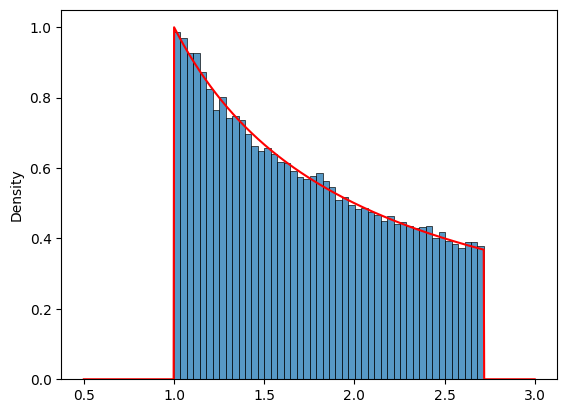

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import e

def f(x):
    return np.where(
        (1 <= x) & (x <= e),
        1/x,
        0
    )

x = np.linspace(0.5, 3, 1000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=ej7_metodo_rechazo()


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

### b) Comparar eficiencia y esperanza

Compare la eficiencia de ambos métodos realizando 10.000 simulaciones y comparando el promedio de los valores obtenidos. Compruebe que se obtiene un valor aproximado del valor esperado de $X$.


In [137]:
%%timeit
ej7_tinv()

141 ns ± 29.2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [138]:
%%timeit
ej7_metodo_rechazo()

596 ns ± 175 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [153]:
from time import time

def esperanza(metodo, N=10_000):
  """
  Estima la esperanza de metodo() usando N simulaciones.

  Retorna una tupla (esperanza, tiempo)
  """
  inicio = time()
  valores = [metodo() for _ in range(N)]
  fin = time()
  return round(sum(valores)/N, 9), round(fin - inicio, 6)

print("Nombre               | Esperanza    | Tiempo")
print(f"Transformada Inversa | {esperanza(ej7_tinv)}")
print(f"Metodo de Rechazo    | {esperanza(ej7_metodo_rechazo)}")


Nombre               | Esperanza    | Tiempo
Transformada Inversa | (1.721897813, 0.001682)
Metodo de Rechazo    | (1.715358711, 0.007117)


### c) Estime $P(X ≤ 2)$

Estime la probabilidad $P(X ≤ 2)$ y compárela con el valor real.

#### Valor real

Ya calculamos antes que
$$
F(x) =
\begin{cases}
0  & \text{si } x < 1, \\
\ln(x) & \text{si } 1 \leq x \leq e, \\
1 & \text{si } x ≥ e, \\
\end{cases}
$$

por lo tanto

$$
P(X ≤ 2) = F(2) = ln(2) = 0,693147
$$

#### Estimación

In [156]:
import numpy as np

def estimacion_prob(x, metodo, N=10_000):
    """
    Estima P(metodo() <= x) usando N simulaciones.
    """
    valores = [metodo() for _ in range(N)]
    cuenta = sum(v <= x for v in valores)
    return cuenta / N

print("Metodo               | Estimacion")
print(f"Transformada Inversa | {estimacion_prob(2, ej7_tinv)}")
print(f"Metodo de Rechazo    | {estimacion_prob(2, ej7_metodo_rechazo)}")
print(f"Valor Real           | {round(np.log(2), 4)}")


Metodo               | Estimacion
Transformada Inversa | 0.6961
Metodo de Rechazo    | 0.6906
Valor Real           | 0.6931


## Ejercicio 8

### a)

Sean $U$ y $V$ dos variables aleatorias uniformes en (0,1) e independientes. Pruebe que la variable $X = U +V$ tiene una densidad triangular:

$$
f(x) =
\begin{cases}
x,        & \text{si } 0 \leq x < 1, \\
2 - x,    & \text{si } 1 \leq x < 2, \\
0,        & \text{en otro caso}.
\end{cases}
$$


#### Demostración

Por def tenemos que $f_U(x) = 1$ y $f_V(x) = 1$.

Por convolución tenemos que:
\begin{align*}
f_X(t) & = ∫_{-∞}^∞ f_U(x)⋅f_V(y-x)\ dx\\
& = ∫_{-∞}^∞ I_{(0,1)}(x)⋅I_{(0,1)}(t-x)\ dx\\
\end{align*}

Notar que si $t-x \in (0,1)$ entonces
\begin{align*}
0 ≤ t-x ≤ 1 \\
0 > x-t > -1 \\
t > x > t-1 \\
\end{align*}
entonces $x \in (t-1, t)$ y seguimos:
\begin{align*}
f_X(t)  & = ∫_{-∞}^∞ I_{(0,1)}(x)⋅I_{(0,1)}(t-x)\ dx \\
& = ∫_{-∞}^∞ I_{(0,1)}(x)⋅I_{(t-1,t)}(x)\ dx \\
\end{align*}

notar que

$$
I_{(0,1)}(x)⋅I_{(t-1,t)}(x) = 1\ \ sii\ x\in(0,1)\cap(t-1,t)
$$

y $(0,1)\cap(t-1,t)$ no es vacio solo si $ t\in(0,2)$. Ahora por casos:

Si $t \in (0,1)$ entonces:
$$
(0,1)\cap(t-1,t) = (0,t)
$$

Si $t \in [1,2)$ entonces:
$$
(0,1)\cap(t-1,t) = (t-1,1)
$$

Recapitulando tenemos que:

Si $t \in (0,1)$ entonces:
\begin{align*}
f_X(t) & = ∫_{0}^t 1\ dx \\
& = [x]_0^t \\
& = t - x \\
& = t
\end{align*}

Si $t \in [1,2)$ entonces:
\begin{align*}
f_X(t) & = ∫_{t-1}^1 1\ dx \\
& = [x]_{t-1}^1 \\
& = 1 - (t-1) \\
& = 1 - t + 1 \\
& = 2 - t
\end{align*}

entonces:

$$
f(x) =
\begin{cases}
x,        & \text{si } 0 \leq x < 1, \\
2 - x,    & \text{si } 1 \leq x < 2, \\
0,        & \text{en otro caso}.
\end{cases}
$$


### b)

Desarrolle tres algoritmos que simulen la variable $X$:

#### i) Suma de dos uniformes

##### Código

In [159]:
from random import random

def ej8_sum_unif():
  return random() + random()

##### Revisamos

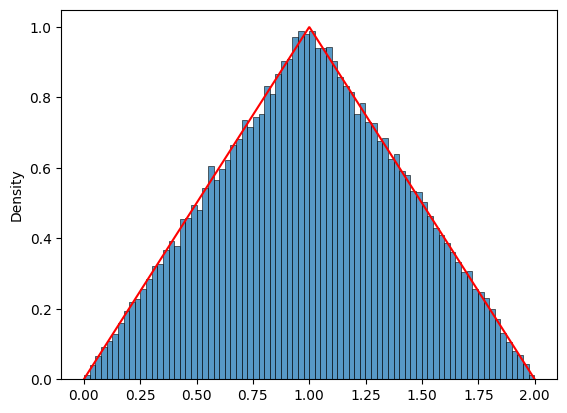

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

def f(x):
    return np.where(
        (0 <= x) & (x < 2),
         np.where(
            (x < 1),
            x,
            2-x
        ),
        0
    )

x = np.linspace(0, 2, 1000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=ej8_sum_unif()


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

#### ii) Transformada inversa

##### Parte teorica

Tenemos que calcular F(x), vamos por casos:

Si $0 ≤ x < 1$
\begin{align*}
F(x) & = ∫_{-∞}^x f(x) dx \\
& = ∫_{0}^x x dx \\
& = \left[\frac{x^2}{2} \right]_0^x \\
& = \frac{x^2}{2} - \frac{0^2}{2} \\
& = \frac{x^2}{2} \\
\end{align*}

Si $1 ≤ x < 2$
\begin{align*}
F(x) & = ∫_{-∞}^x f(x) dx \\
& = ∫_{-∞}^{1} f(x) dx + ∫_{1}^x 2 - x\ dx \\
& = F(1) + ∫_{1}^x 2 - x\ dx \\
& = \frac{1}{2}  + ∫_{1}^x 2 - x\ dx \\
& = \frac{1}{2}  + ∫_{1}^x 2\ dx - ∫_{1}^x x\ dx \\
& = \frac{1}{2}  + 2 ⋅ [x]_0^x  - \left[\frac{x^2}{2} \right]_1^x  \\
& = \frac{1}{2}  + 2 ⋅ (x-2)  - \left(\frac{x^2}{2} - \frac{1^2}{2} \right)  \\
& = \frac{1}{2}  + 2 ⋅ x - 2  - \left(\frac{x^2}{2} - \frac{1}{2} \right)  \\
& = \frac{1}{2}  + 2 ⋅ x - 2  - \frac{x^2}{2} + \frac{1}{2} \\
& = - \frac{x^2}{2} + 2x  - 1 \\
\end{align*}

entonces:

$$
F(x) =
\begin{cases}
\frac{1}{2} x^2               & \text{si } 0 \leq x < 1, \\
-\frac{1}{2} x^2 + 2x  - 1    & \text{si } 1 \leq x < 2, \\
0                             & \text{en otro caso}.
\end{cases}
$$

> Revisemos: $F(2) = -\frac{1}{2} 2^2 + 2\cdot2 - 1 = -2 + 4 - 1 = 2-1 = 1$, esta bien.

> Punto de quiebre: $F(1) = -\frac{1}{2} 1^2 + 2 - 1  = -\frac{1}{2} + 1 = 1/2$

ahora nos queda igualar a $u$ una uniforme en el 0,1 y despejar x:

Caso 1:
\begin{align*}
\frac{1}{2} x^2 & = u \\
x^2 & = u⋅2 \\
x & = \sqrt{u⋅2} \\
\end{align*}

Caso 2:
\begin{align*}
-\frac{1}{2} x^2 + 2x  - 1  & = u \\
-\frac{1}{2} x^2 + 2x (-1-u) & = 0 \\
\end{align*}

aplicamos bhaskara con $a=(-\frac{1}{2})$, $b=2$ y $c=(-1-u)$:
\begin{align*}
x_i & = \frac{-2 \pm \sqrt{2^2 - 4(-\frac{1}{2})(-1-u)}}{2(-\frac{1}{2})} \\
 & =\frac{-2 \pm \sqrt{4 + 2(-1-u)}}{-1} \\
 & = -(-2 \pm \sqrt{4 + 2(-1-u)}) \\
 & = 2 \pm \sqrt{4-2(1+u)} \\
\end{align*}

claramente si queremos que $x_i$ este en el intervalo $[1,2]$ devemos usar la formula $x = 2 - \sqrt{4-2(1+u)}$



##### Código

In [166]:
from random import random

def ej8_tinv():
  u = random()
  if u < 0.5:
    return (2*u)**0.5
  else:
    return 2 - (4-2*(1+u))**0.5


##### Revisamos

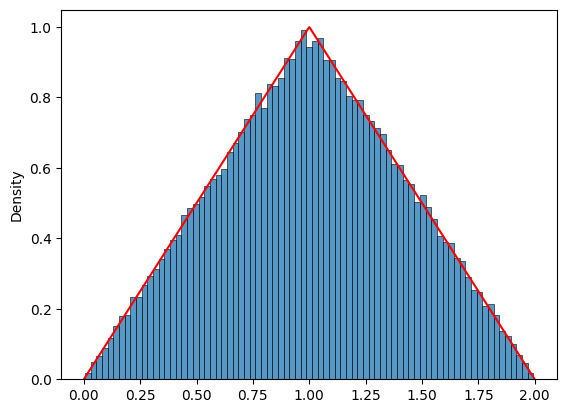

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

def f(x):
    return np.where(
        (0 <= x) & (x < 2),
         np.where(
            (x < 1),
            x,
            2-x
        ),
        0
    )

x = np.linspace(0, 2, 1000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=ej8_tinv()


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

#### iii) Método de rechazo

##### Parte teorica

Claramente vamos a aproximar con $Y \backsim U(0,2)$ (es lo más sensillo).

Entonces $f_Y(x) = 1/2$ y si buscamos el $c$, tenemos que:

$$
\frac{f(x)}{f_Y(x)} = 2 \cdot f(x)
$$

claramente $c = 2$ ya que $f(x)$ es creciente en el 0,1 y el maximo es 1 y es decreiente en el 1,2 y el maximo es 1.

En el metodo podemos simplificar:
$$
\frac{f(y)}{c \cdot f_Y(y)} = \frac{f(y)}{2 \cdot 1/2} = f(x)
$$


##### Código

In [169]:
from random import random
import math

def ej8_f(x):
  if x < 1:
    return x
  else:
    return 2-x

def uniforme(a,b):
  return a + (b-a)*random()

def ej8_metodo_rechazo():
  while True:
    y = uniforme(0,2)
    u = random()
    if u <= ej8_f(y):
      return y

In [170]:
ej8_metodo_rechazo()

0.7258876522206616

##### Revisamos

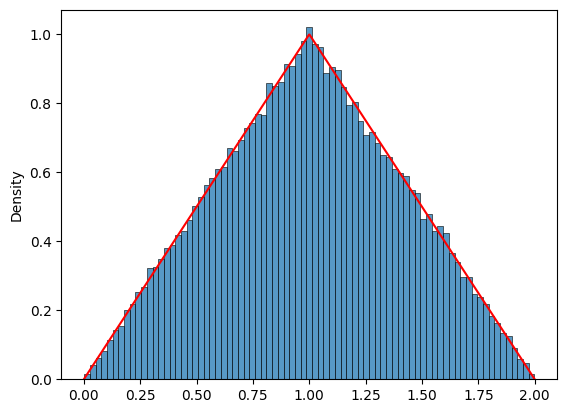

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

def f(x):
    return np.where(
        (0 <= x) & (x < 2),
         np.where(
            (x < 1),
            x,
            2-x
        ),
        0
    )

x = np.linspace(0, 2, 1000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=ej8_metodo_rechazo()


sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()

### c)  Comparación  🤔 🤔

Compare la eficiencia de los tres algoritmos. Para cada caso, estimar el valor esperado promediando 10.000 valores simulados.

¿Para qué valor $x_0$ se cumple que $P(X > x_0) = 0.125$?

In [174]:
%%timeit
ej8_sum_unif()

190 ns ± 71.5 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [178]:
%%timeit
ej8_tinv()

260 ns ± 7.08 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [176]:
%%timeit
ej8_metodo_rechazo()

675 ns ± 7.33 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [177]:
from time import time

def ej8_esperanza(metodo, N=10_000):
  """
  Estima la esperanza de metodo() usando N simulaciones.

  Retorna una tupla (esperanza, tiempo)
  """
  inicio = time()
  valores = [metodo() for _ in range(N)]
  fin = time()
  return round(sum(valores)/N, 9), round(fin - inicio, 6)

print("Nombre               | Esperanza    | Tiempo")
print(f"Suma de 2 unif       | {ej8_esperanza(ej8_sum_unif)}")
print(f"Transformada Inversa | {ej8_esperanza(ej8_tinv)}")
print(f"Metodo de Rechazo    | {ej8_esperanza(ej8_metodo_rechazo)}")

Nombre               | Esperanza    | Tiempo
Suma de 2 unif       | (0.993936889, 0.001413)
Transformada Inversa | (1.000904103, 0.004559)
Metodo de Rechazo    | (1.00241919, 0.008378)


### d)  🤔 🤔

Compare la proporción de veces que el algoritmo devuelve un número mayor que $x_0$ con esta probabilidad.
